# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | vadso
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | yulinshi
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | jackson
Processing Record 7 of Set 1 | klyuchi
Processing Record 8 of Set 1 | ilawa
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | constantia
Processing Record 11 of Set 1 | jiangyou
Processing Record 12 of Set 1 | antalaha
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | trincomalee
Processing Record 16 of Set 1 | namibe
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | yel'nya
Processing Record 21 of Set 1 | kotel'nich
Processing Record 22 of Set 1 | kailua-kona
Processing Record 23 of S

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,9.34,71,33,6.97,NZ,1723054907
1,vadso,70.0744,29.7487,24.49,55,0,4.12,NO,1723054908
2,albany,42.6001,-73.9662,24.24,69,89,0.45,US,1723054697
3,yulinshi,38.2906,109.7494,21.37,81,78,3.69,CN,1723054911
4,adamstown,-25.0660,-130.1015,18.64,66,15,3.88,PN,1723054912


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,9.34,71,33,6.97,NZ,1723054907
1,vadso,70.0744,29.7487,24.49,55,0,4.12,NO,1723054908
2,albany,42.6001,-73.9662,24.24,69,89,0.45,US,1723054697
3,yulinshi,38.2906,109.7494,21.37,81,78,3.69,CN,1723054911
4,adamstown,-25.0660,-130.1015,18.64,66,15,3.88,PN,1723054912


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

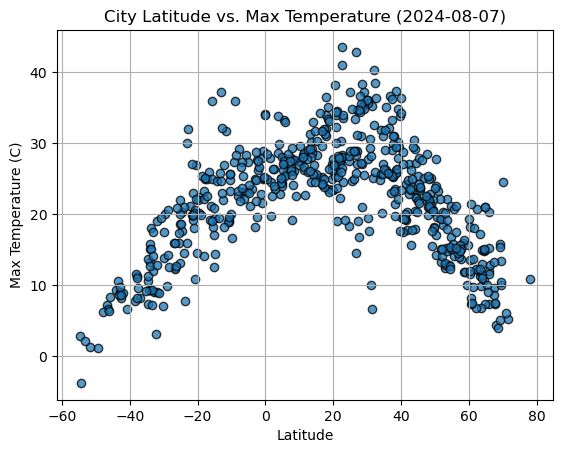

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2024-08-07)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

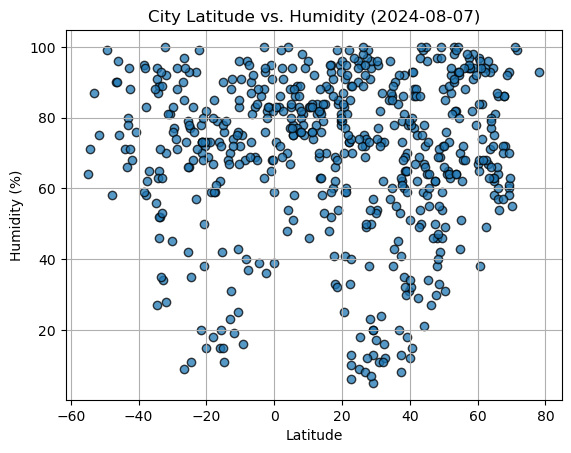

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-08-07)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

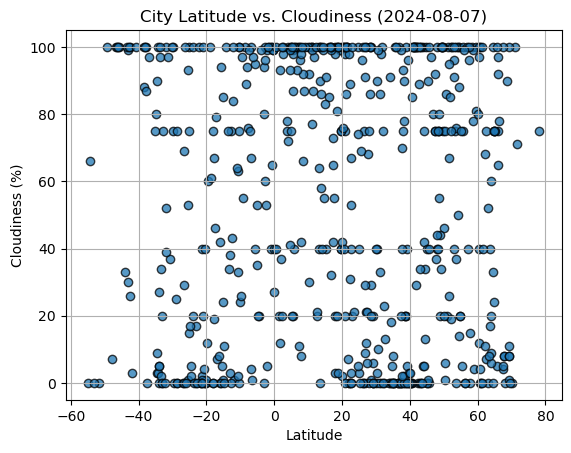

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-08-07)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

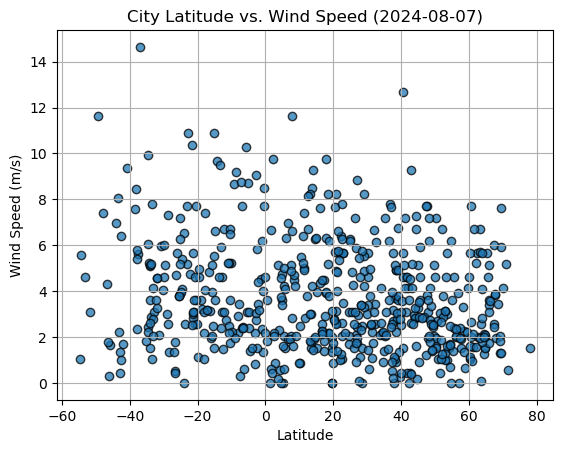

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-08-07)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def linreg_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    f, ax = plt.subplots()
    ax.scatter(x,y)
    ax.plot(x, regress_values, 'red')
    
    return ax, line_eq, rvalue


In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vadso,70.0744,29.7487,24.49,55,0,4.12,NO,1723054908
2,albany,42.6001,-73.9662,24.24,69,89,0.45,US,1723054697
3,yulinshi,38.2906,109.7494,21.37,81,78,3.69,CN,1723054911
5,jackson,42.4165,-122.8345,27.08,29,0,0.00,US,1723054267
6,klyuchi,52.2667,79.1667,18.48,87,100,3.79,RU,1723054914


In [73]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,9.34,71,33,6.97,NZ,1723054907
4,adamstown,-25.0660,-130.1015,18.64,66,15,3.88,PN,1723054912
11,antalaha,-14.9003,50.2788,19.49,76,11,3.62,MG,1723054919
12,bredasdorp,-34.5322,20.0403,10.57,94,3,2.44,ZA,1723054921
13,blackmans bay,-43.0167,147.3167,9.07,80,99,0.45,AU,1723054922


###  Temperature vs. Latitude Linear Regression Plot

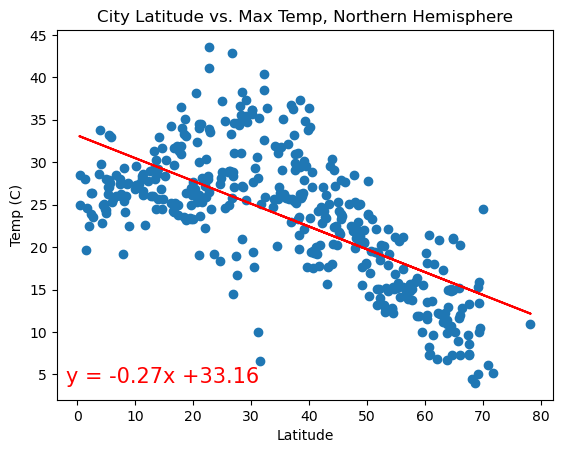

R-value: -0.6666769185265743


In [76]:
# Linear regression on Northern Hemisphere
ax, line_eq, rvalue =linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
ax.plot()

plt.title('City Latitude vs. Max Temp, Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temp (C)')
plt.annotate(line_eq,(-2,4),fontsize=15,color="red")
plt.savefig("output_data/Fig5.png")
plt.show()

print(f"R-value: {rvalue}")

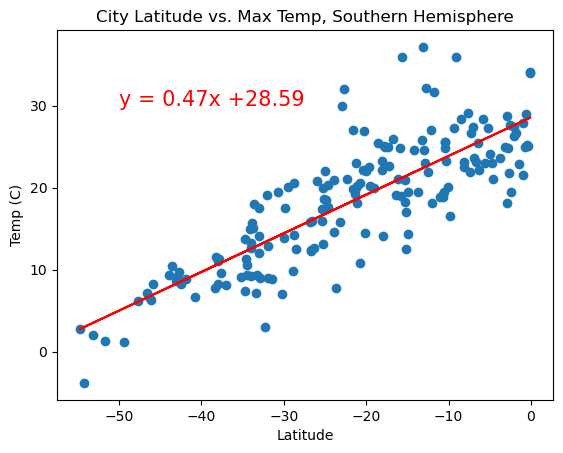

R-value: 0.8256441165199697


In [77]:
# Linear regression on Southern Hemisphere
ax, line_eq, rvalue =linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
ax.plot()
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.title('City Latitude vs. Max Temp, Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temp (C)')
plt.savefig("output_data/Fig6.png")
plt.show()
print(f"R-value: {rvalue}")

**Discussion about the linear relationship:** The relationship between latitude and temperature is much stronger in the northern than southern hemishpere, as seen in the tightness of the scatterplot points and will as the R squared values. However the trend is the same for both; the further from the equator, the colder the temperature.

### Humidity vs. Latitude Linear Regression Plot

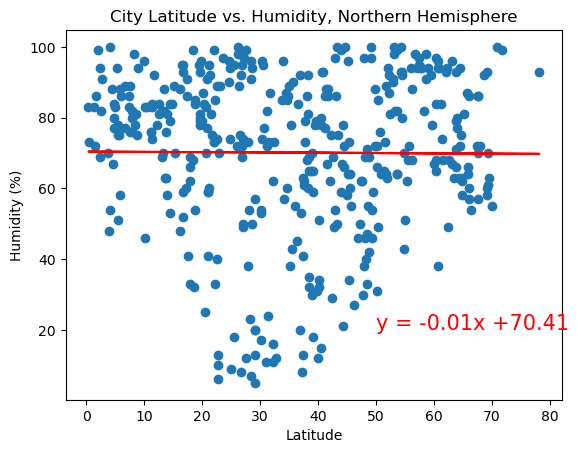

R-value: -0.006826564801583969


<Figure size 640x480 with 0 Axes>

In [78]:
# Northern Hemisphere
ax, line_eq, rvalue =linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
ax.plot()
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.title('City Latitude vs. Humidity, Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
plt.savefig("output_data/Fig7.png")
print(f"R-value: {rvalue}")

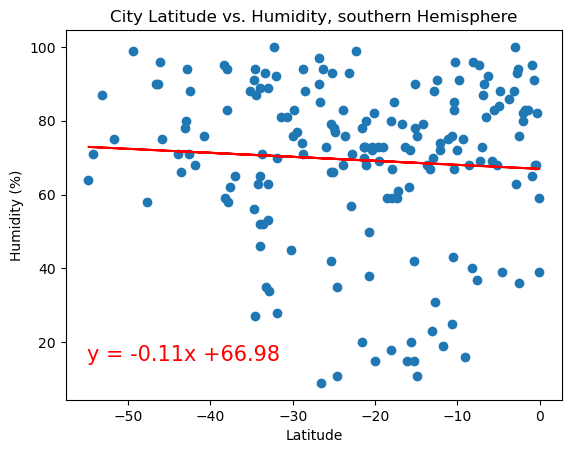

R-value: -0.06733275414020684


In [79]:
# Southern Hemisphere
ax, line_eq, rvalue =linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
ax.plot()
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.title('City Latitude vs. Humidity, southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("output_data/Fig8.png")
plt.show()
print(f"R-value: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

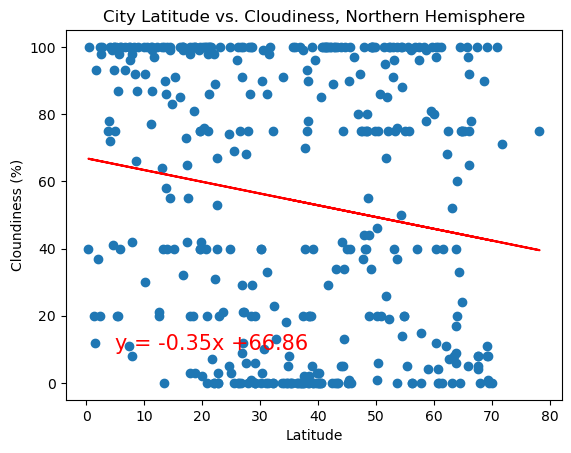

R-value: -0.1662924975367161


In [80]:
# Northern Hemisphere
ax, line_eq, rvalue =linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
ax.plot()
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.title('City Latitude vs. Cloudiness, Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloundiness (%)')
plt.savefig("output_data/Fig9.png")
plt.show()
print(f"R-value: {rvalue}")

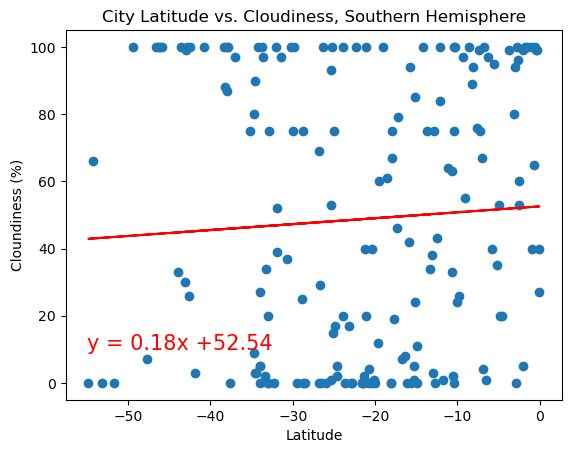

R-value: 0.05896581900082672


In [81]:
# Southern Hemisphere
ax, line_eq, rvalue =linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
ax.plot()
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.title('City Latitude vs. Cloudiness, Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloundiness (%)')
plt.savefig("output_data/Fig10.png")
plt.show()
print(f"R-value: {rvalue}")

**Discussion about the linear relationship:** The relationship between latitude and cloud cover is not very strong, but it is surprisingly similar for both hemishperes. The regressions indicate a one degree latitude change is related to roughly 0.5% change in cloud cover on average.

### Wind Speed vs. Latitude Linear Regression Plot

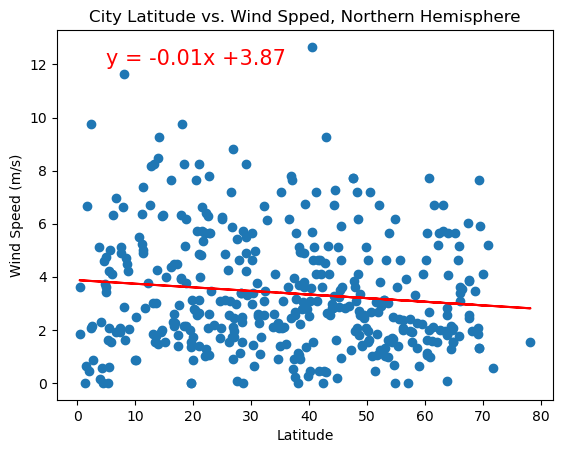

R-value: -0.11859373770011182


In [82]:
# Northern Hemisphere
ax, line_eq, rvalue =linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
ax.plot()
plt.annotate(line_eq,(5,12),fontsize=15,color="red")
plt.title('City Latitude vs. Wind Spped, Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.savefig("output_data/Fig11.png")
plt.show()
print(f"R-value: {rvalue}")

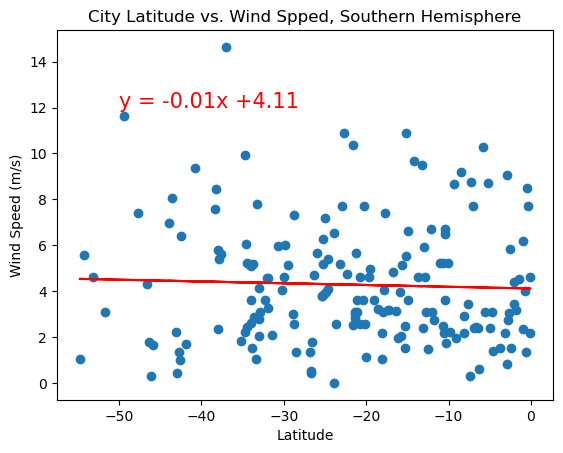

R-value: -0.039772336188957445


In [83]:
# Southern Hemisphere
ax, line_eq, rvalue =linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
ax.plot()
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.title('City Latitude vs. Wind Spped, Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.savefig("output_data/Fig12.png")
plt.show()
print(f"R-value: {rvalue}")

**Discussion about the linear relationship:** There is essentially no (linear) relationship between latitude and wind speed. For both hemisphere the slope coefficients and r-values are near zero.